In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

In [2]:
df=pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.rename(columns = {'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'Naive_Bayes_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'Naive_Bayes_mon_2'}, inplace = True)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
'''Nunique Columns'''

def nunique_counts(df):
   for i in df.columns:
       count = df[i].nunique()
       print(i, ": ", count)
nunique_counts(df)

CLIENTNUM :  10127
Attrition_Flag :  2
Customer_Age :  45
Gender :  2
Dependent_count :  6
Education_Level :  7
Marital_Status :  4
Income_Category :  6
Card_Category :  4
Months_on_book :  44
Total_Relationship_Count :  6
Months_Inactive_12_mon :  7
Contacts_Count_12_mon :  7
Credit_Limit :  6205
Total_Revolving_Bal :  1974
Avg_Open_To_Buy :  6813
Total_Amt_Chng_Q4_Q1 :  1158
Total_Trans_Amt :  5033
Total_Trans_Ct :  126
Total_Ct_Chng_Q4_Q1 :  830
Avg_Utilization_Ratio :  964
Naive_Bayes_mon_1 :  1704
Naive_Bayes_mon_2 :  640


In [5]:
'''Unique Columns'''

def unique_counts(data):
    features = df.dtypes[df.dtypes == "object"].index.values.tolist()
    for i in features:
        count = data[i].unique()
        print(i, ": ", count, len(count))
        
unique_counts(df)

Attrition_Flag :  ['Existing Customer' 'Attrited Customer'] 2
Gender :  ['M' 'F'] 2
Education_Level :  ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate'] 7
Marital_Status :  ['Married' 'Single' 'Unknown' 'Divorced'] 4
Income_Category :  ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown'] 6
Card_Category :  ['Blue' 'Gold' 'Silver' 'Platinum'] 4


In [6]:
'''Label Encoding With Label'''
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['CLIENTNUM'])

l = [i for i in range(10127)]
dict(zip(list(le.classes_), l))

df['CLIENTNUM'] = le.transform(df['CLIENTNUM'])

In [7]:
df['CLIENTNUM'].unique()

array([7152, 9812, 3053, ..., 4406, 4840, 3261], dtype=int64)

In [8]:
'''Checking Duplicate'''

print('Dupplicate entries: {}'.format(df.duplicated().sum()))

Dupplicate entries: 0


0


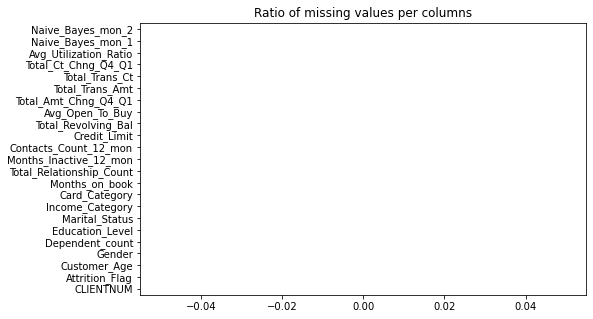

In [9]:
'''Missing Value Chart'''
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")
print(df.isnull().values.sum()) #total missing values

array([[<AxesSubplot:title={'center':'CLIENTNUM'}>,
        <AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>],
       [<AxesSubplot:title={'center':'Total_Relationship_Count'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>],
       [<AxesSubplot:title={'center':'Total_Revolving_Bal'}>,
        <AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>],
       [<AxesSubplot:title={'center':'Total_Trans_Ct'}>,
        <AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Naive_Bayes_mon_1'}>],
       [<AxesSubplot:title={'center':'N

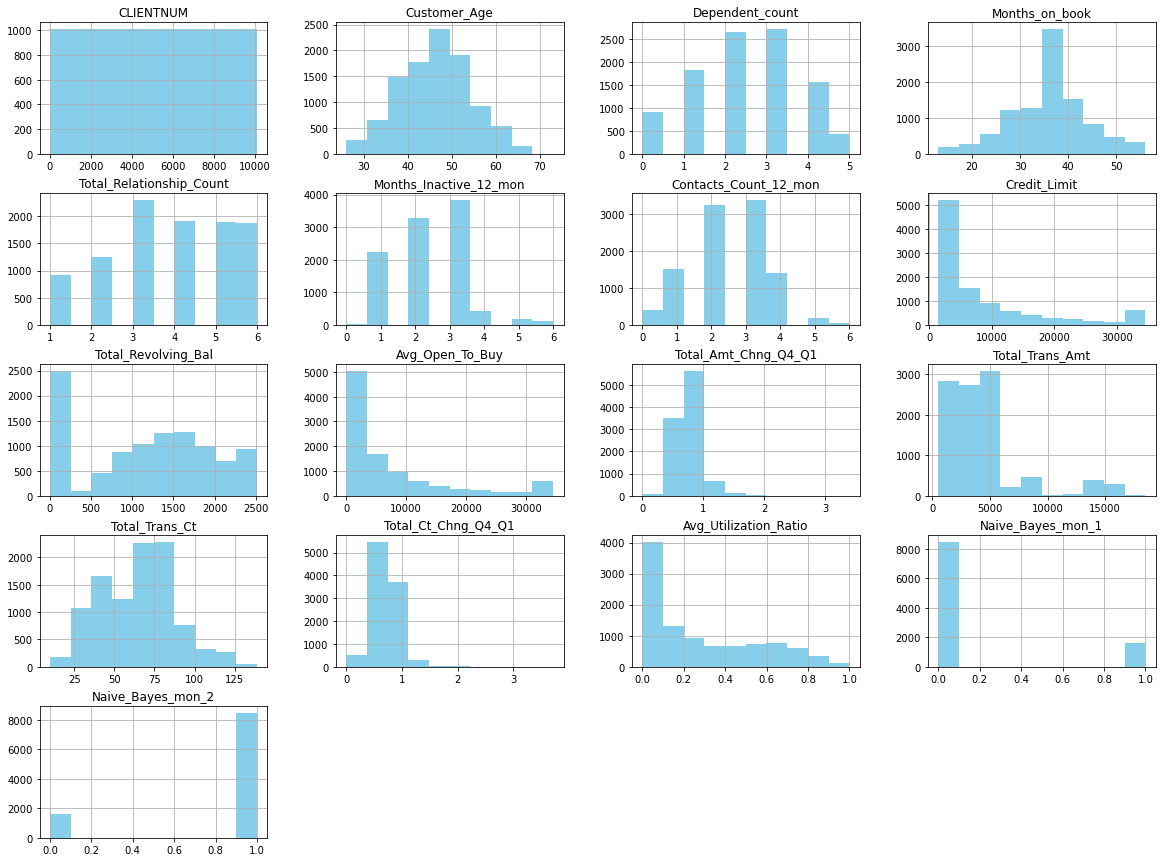

In [10]:
df.hist(figsize=(20,15),color="skyblue")

In [11]:
df.describe(include='all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
count,10127.000000,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5063.000000,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,2923.557422,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,0.000000,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,2531.500000,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,5063.000000,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7594.500000,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900


ValueError: num must be 1 <= num <= 14, not 15

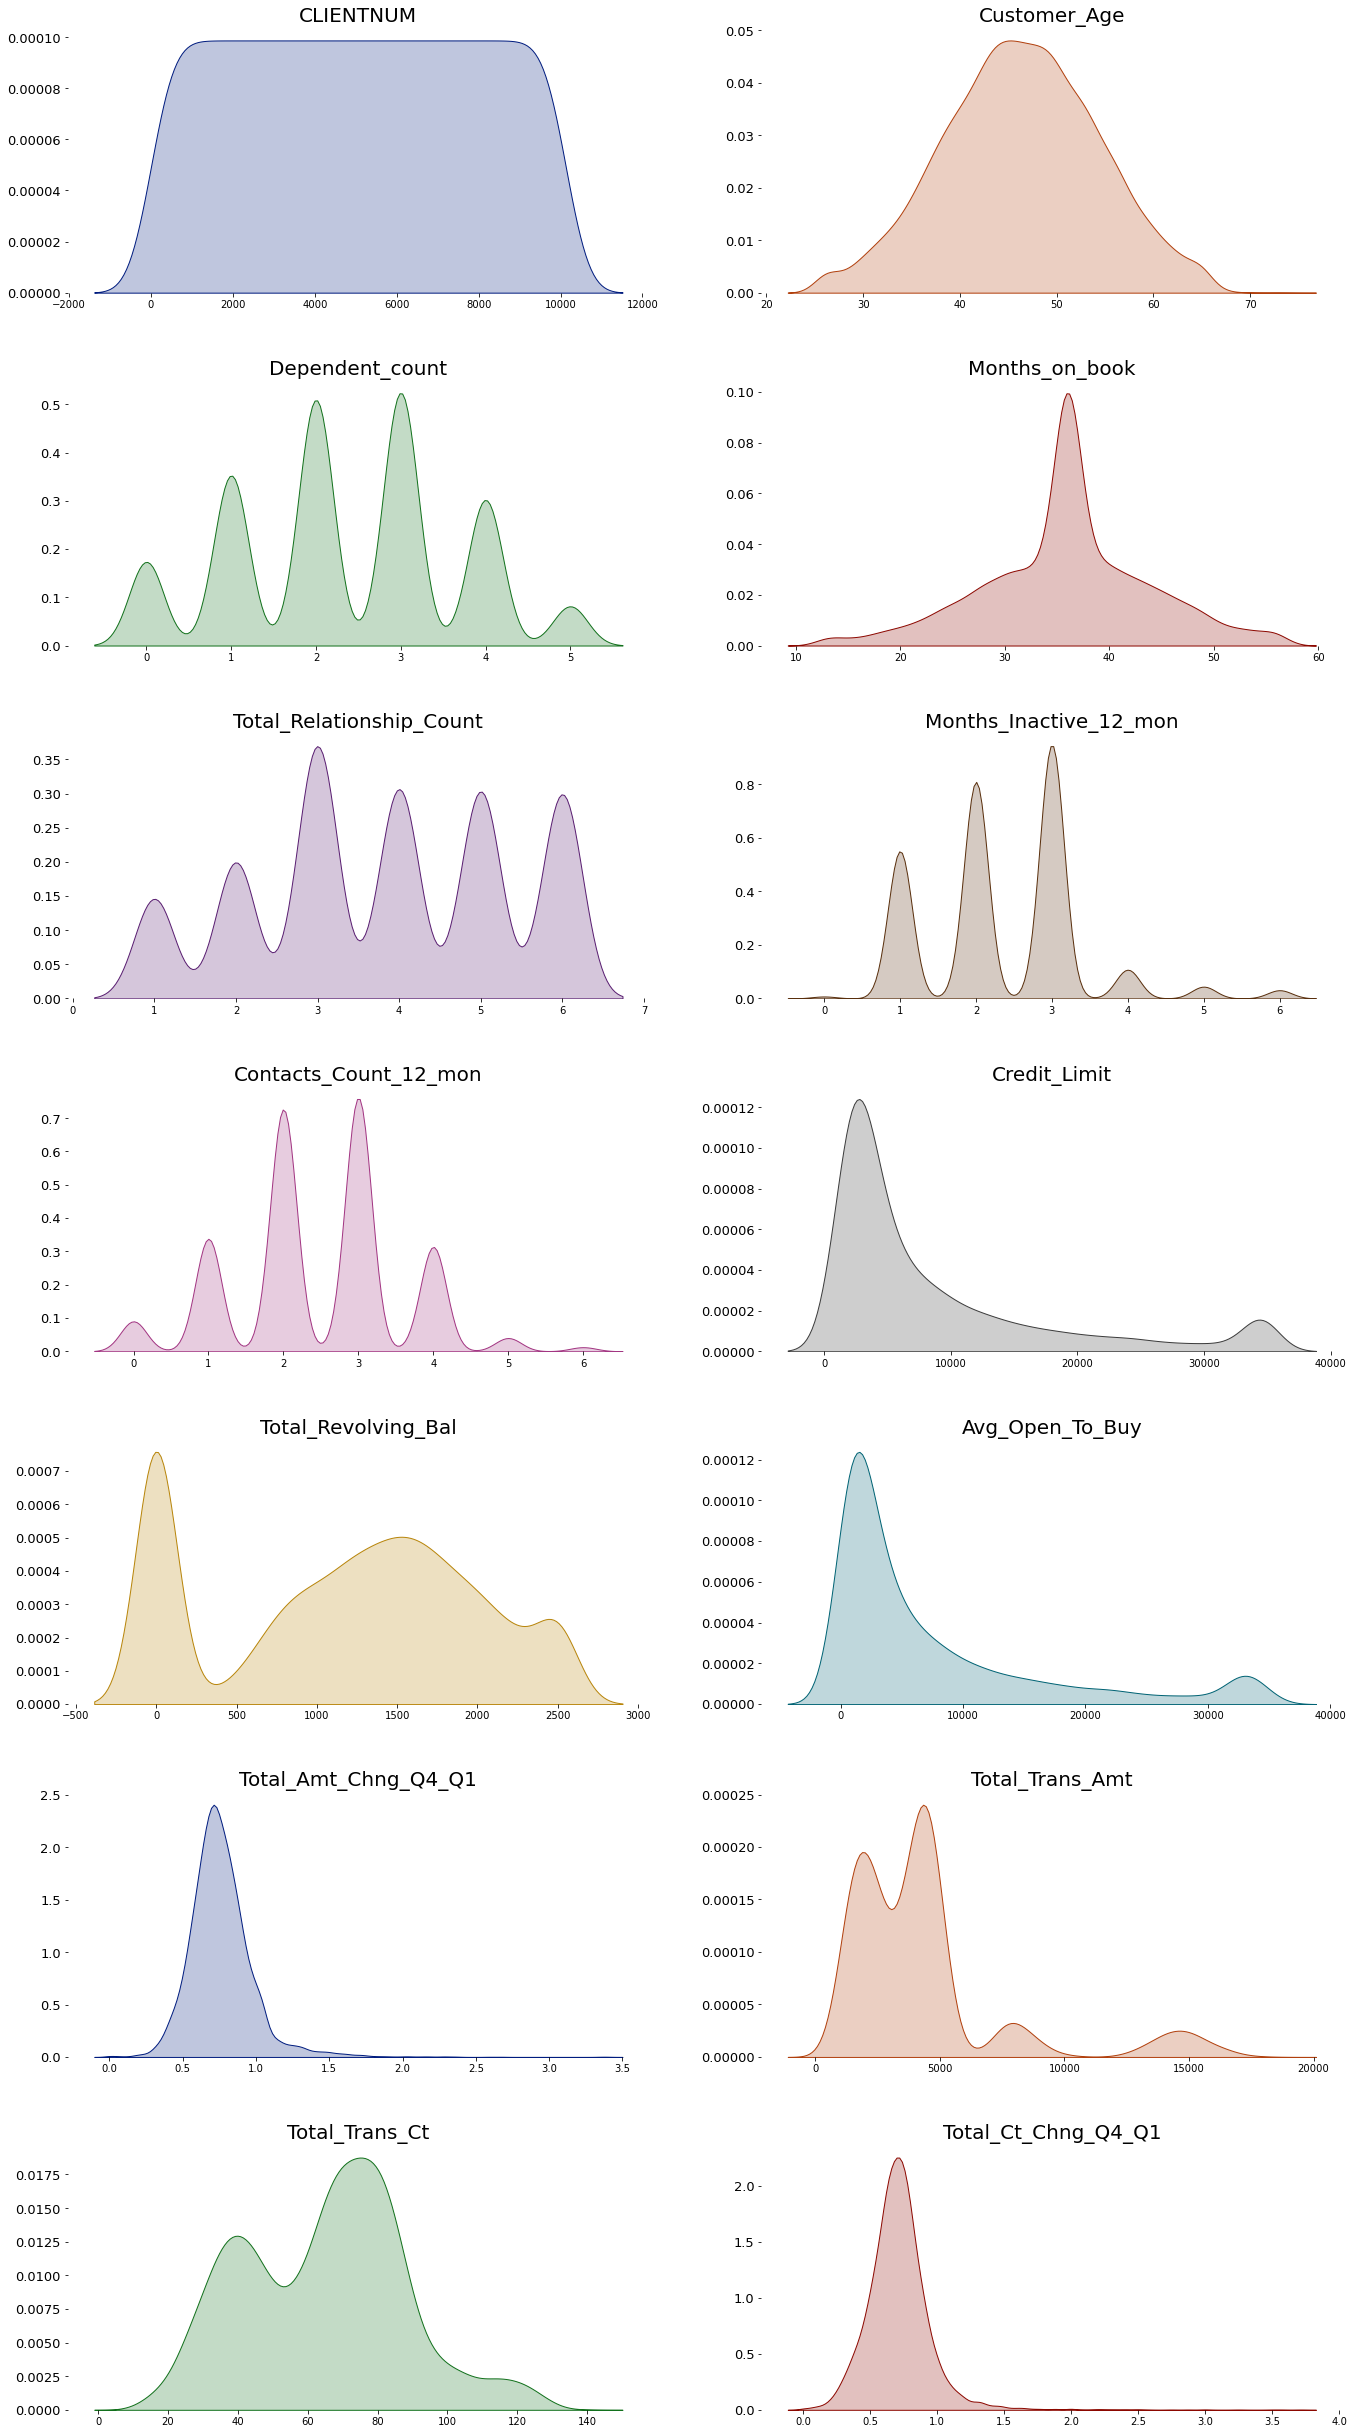

In [12]:
def plot_design():
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=13, color='black')
    plt.box(False)
    plt.title(i[1], fontsize=20, color='black')
    plt.tight_layout(pad=5.0)
    plt.grid(b=None)

categ = df.select_dtypes(include=object).columns
numeric = df.select_dtypes(exclude=object).columns
fig, ax = plt.subplots(figsize =(20, 35))
fig.patch.set_facecolor('white')


colors = sns.color_palette("dark", n_colors=14).as_hex()

# Loop columns
for i in (enumerate(numeric)):
    plt.subplot(7, 2, i[0]+1)
    sns.kdeplot(x = i[1], data = df, color=colors[i[0]], fill=True)
    plt.grid(b=None)
    plot_design()

In [13]:
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import plotly.tools as tools
import warnings
from collections import Counter 
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=('Atrition Flag','Gender'))

# Based on Attrition_Flag

custom_aggregation = {}
custom_aggregation["CLIENTNUM"] = "count"
data2 = df.groupby("Attrition_Flag").agg(custom_aggregation)
data2.columns = ["Number of Client"]
data2['Client Type'] = data2.index

labels = data2['Client Type'].tolist()
values = data2['Number of Client'].tolist()

fig.add_trace(go.Pie(
                    labels=labels, 
                    values=values, 
                    name="Client Type"),
                    1, 1)


# Based on Attrition_Flag

custom_aggregation = {}
custom_aggregation["CLIENTNUM"] = "count"
data2 = df.groupby("Gender").agg(custom_aggregation)
data2.columns = ["Number of Client"]
data2['Gender'] = data2.index

labels = data2['Gender'].tolist()
values = data2['Number of Client'].tolist()

fig.add_trace(go.Pie(
                    labels=labels, 
                    values=values, 
                    name="Gender"),
                    1, 2)

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig['layout'].update(height=500, width=900, title='Number of Client based on:')
fig.show()

In [14]:
fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=('Educational Level','Marital Status'))

# Based on Education_Level

custom_aggregation = {}
custom_aggregation["CLIENTNUM"] = "count"
data2 = df.groupby("Education_Level").agg(custom_aggregation)
data2.columns = ["Number of Client"]
data2['Education Level'] = data2.index

labels = data2['Education Level'].tolist()
values = data2['Number of Client'].tolist()

fig.add_trace(go.Pie(
                    labels=labels, 
                    values=values, 
                    name="Education Level"),
                    1, 1)


# Based on Marital_Status

custom_aggregation = {}
custom_aggregation["CLIENTNUM"] = "count"
data2 = df.groupby("Marital_Status").agg(custom_aggregation)
data2.columns = ["Number of Client"]
data2['Marital Status'] = data2.index

labels = data2['Marital Status'].tolist()
values = data2['Number of Client'].tolist()

fig.add_trace(go.Pie(
                    labels=labels, 
                    values=values, 
                    name="Marital Status"),
                    1, 2)

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig['layout'].update(height=500, width=900, title='Number of Client based on:')
fig.show()

In [15]:
fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=('Income Category','Card Category'))

# Based on Income_Category

custom_aggregation = {}
custom_aggregation["CLIENTNUM"] = "count"
data2 = df.groupby("Income_Category").agg(custom_aggregation)
data2.columns = ["Number of Client"]
data2['Income Category'] = data2.index

labels = data2['Income Category'].tolist()
values = data2['Number of Client'].tolist()

fig.add_trace(go.Pie(
                    labels=labels, 
                    values=values, 
                    name="Income Category"),
                    1, 1)


# Based on Card_Category

custom_aggregation = {}
custom_aggregation["CLIENTNUM"] = "count"
data2 = df.groupby("Card_Category").agg(custom_aggregation)
data2.columns = ["Number of Client"]
data2['Card Category'] = data2.index

labels = data2['Card Category'].tolist()
values = data2['Number of Client'].tolist()

fig.add_trace(go.Pie(
                    labels=labels, 
                    values=values, 
                    name="Card Category"),
                    1, 2)

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig['layout'].update(height=500, width=900, title='Number of Client based on:')
fig.show()

In [16]:
import plotly.express as px

fig = px.box(df, x="Attrition_Flag", y="Customer_Age", color="Attrition_Flag", boxmode="overlay")

fig['layout'].update(height=500, width=750, title='Customer Age Based on Attrition Flag')
fig.update_traces(quartilemethod="inclusive")
fig.show()

In [17]:

fig = px.box(df, x="Attrition_Flag", y="Dependent_count", color="Attrition_Flag", boxmode="overlay")

fig['layout'].update(height=500, width=750, title='Dependent Count Based on Attrition Flag')
fig.update_traces(quartilemethod="inclusive")
fig.show()

In [18]:
custom_aggregation = {}
custom_aggregation["Months_on_book"] = "mean"
custom_aggregation["Total_Relationship_Count"] = "mean"
custom_aggregation["Months_Inactive_12_mon"] = "mean"
custom_aggregation["Contacts_Count_12_mon"] = "mean"
custom_aggregation["Credit_Limit"] = "mean"
custom_aggregation["Total_Revolving_Bal"] = "mean"

data2 = df.groupby("Attrition_Flag").agg(custom_aggregation)
data2['Customer'] = data2.index

d1 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Months_on_book"],
    name='Months on Book')

d2 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Total_Relationship_Count"],
    name='Total Relationship')

d3 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Months_Inactive_12_mon"],
    name='Months Inactive')

d4 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Contacts_Count_12_mon"],
    name='Contact Count')

d5 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Credit_Limit"],
    name='Credit Limit')

d6 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Total_Revolving_Bal"],
    name='Revolving Balance')



data = [d1,d2,d3,d4,d5,d6]

fig = tools.make_subplots(rows=3, 
                          cols=2, 
                          #specs=[[{}, {}], [{'colspan': 1}, None]],
                          subplot_titles=('Months on Book',
                                         'Total Relationship',
                                         'Months Inactive',
                                         'Contact Count',
                                         'Credit Limit',
                                         'Revolving Balance'))

fig.append_trace(d1, 1, 1)
fig.append_trace(d2, 1, 2)
fig.append_trace(d3, 2, 1)
fig.append_trace(d4, 2, 2)
fig.append_trace(d5, 3, 1)
fig.append_trace(d6, 3, 2)

fig['layout'].update(height=1000, width=900, title='Attrited vs Existing Customer', boxmode='group')
py.iplot(fig, filename='combined-savings')

C:\Users\Ricardo\anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [19]:
custom_aggregation = {}
custom_aggregation["Avg_Open_To_Buy"] = "mean"
custom_aggregation["Total_Amt_Chng_Q4_Q1"] = "mean"
custom_aggregation["Total_Trans_Amt"] = "mean"
custom_aggregation["Total_Trans_Ct"] = "mean"
custom_aggregation["Total_Ct_Chng_Q4_Q1"] = "mean"
custom_aggregation["Avg_Utilization_Ratio"] = "mean"

data2 = df.groupby("Attrition_Flag").agg(custom_aggregation)
data2['Customer'] = data2.index

d1 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Avg_Open_To_Buy"],
    name='Avg. Open to Buy')

d2 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Total_Amt_Chng_Q4_Q1"],
    name='Amount Change')

d3 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Total_Trans_Amt"],
    name='Transaction Amount')

d4 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Total_Trans_Ct"],
    name='Transaction Count')

d5 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Total_Ct_Chng_Q4_Q1"],
    name='Count Change')

d6 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Avg_Utilization_Ratio"],
    name='Avg. Utilization Ratio')


data = [d1,d2,d3,d4,d5,d6]

fig = tools.make_subplots(rows=3, 
                          cols=2, 
                          #specs=[[{}, {}], [{'colspan': 1}, None]],
                          subplot_titles=('Avg. Open to Buy',
                                         'Amount Change',
                                         'Transaction Amount',
                                         'Transaction Count',
                                         'Count Change',
                                         'Avg. Utilization Ratio'))

fig.append_trace(d1, 1, 1)
fig.append_trace(d2, 1, 2)
fig.append_trace(d3, 2, 1)
fig.append_trace(d4, 2, 2)
fig.append_trace(d5, 3, 1)
fig.append_trace(d6, 3, 2)

fig['layout'].update(height=1000, width=900, title='Attrited vs Existing Customer', boxmode='group')
py.iplot(fig, filename='combined-savings')

# Preprocessing

In [20]:
df = df[~df['Education_Level'].str.contains('Unknown')] 
df = df[~df['Marital_Status'].str.contains('Unknown')]
df = df[~df['Income_Category'].str.contains('Unknown')]

In [21]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [22]:
df['Attrition_Flag'][df['Attrition_Flag'] == 'Existing Customer'] = 0
df['Attrition_Flag'][df['Attrition_Flag'] == 'Attrited Customer'] = 1

In [23]:
df['Education_Level'][df['Education_Level'] == 'Uneducated'] = 0
df['Education_Level'][df['Education_Level'] == 'High School'] = 1
df['Education_Level'][df['Education_Level'] == 'Graduate'] = 2
df['Education_Level'][df['Education_Level'] == 'Post-Graduate'] = 3
df['Education_Level'][df['Education_Level'] == 'College'] = 4
df['Education_Level'][df['Education_Level'] == 'Doctorate'] = 5

In [24]:
from sklearn.preprocessing import LabelEncoder

le.fit(df['Gender'])

df['Gender'] = le.transform(df['Gender'])

l = [i for i in range(2)]
dict(zip(list(le.classes_), l))

{'F': 0, 'M': 1}

In [25]:
le.fit(df['Marital_Status'])

df['Marital_Status'] = le.transform(df['Marital_Status'])

l = [i for i in range(4)]
dict(zip(list(le.classes_), l))

{'Divorced': 0, 'Married': 1, 'Single': 2}

In [26]:
le.fit(df['Income_Category'])

df['Income_Category'] = le.transform(df['Income_Category'])

l = [i for i in range(6)]
dict(zip(list(le.classes_), l))

{'$120K +': 0,
 '$40K - $60K': 1,
 '$60K - $80K': 2,
 '$80K - $120K': 3,
 'Less than $40K': 4}

In [27]:
le.fit(df['Card_Category'])

df['Card_Category'] = le.transform(df['Card_Category'])

l = [i for i in range(4)]
dict(zip(list(le.classes_), l))

{'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}

In [28]:
le.fit(df['Attrition_Flag'])

df['Attrition_Flag'] = le.transform(df['Attrition_Flag'])

l = [i for i in range(2)]
dict(zip(list(le.classes_), l))

{0: 0, 1: 1}

In [29]:
df.groupby('Attrition_Flag').size()

Attrition_Flag
0    5968
1    1113
dtype: int64

In [30]:
df = df.sample(frac=1)

exis = df.loc[df['Attrition_Flag'] == 1]
attr = df.loc[df['Attrition_Flag'] == 0][:1627]


normal_distributed_df = pd.concat([exis, attr])

# Shuffle dataframe rows
df = normal_distributed_df.sample(frac=1, random_state=42)

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
9808,3160,1,34,1,0,2,0,3,3,24,1,2,3,34516.0,400,34116.0,0.202,5112,49,0.256,0.012,0.993310,0.00669
8623,962,1,49,1,1,2,1,1,0,40,6,1,4,14973.0,0,14973.0,0.895,4517,59,0.439,0.000,0.993300,0.00670
953,904,0,34,1,1,2,1,3,0,36,5,3,2,6313.0,782,5531.0,0.931,1703,34,0.889,0.124,0.000169,0.99983
5992,5084,0,44,1,2,0,1,3,0,34,6,3,3,2558.0,2016,542.0,0.806,3792,78,0.500,0.788,0.000311,0.99969
2746,4174,0,31,1,0,2,2,1,0,24,3,1,4,12050.0,1732,10318.0,0.804,2015,46,0.704,0.144,0.000136,0.99986


In [31]:
df.groupby('Attrition_Flag').size()

Attrition_Flag
0    1627
1    1113
dtype: int64

In [32]:
for feature in df.columns:
    if df[feature].dtype =='object':
        df[feature] = pd.Categorical(df[feature]).codes

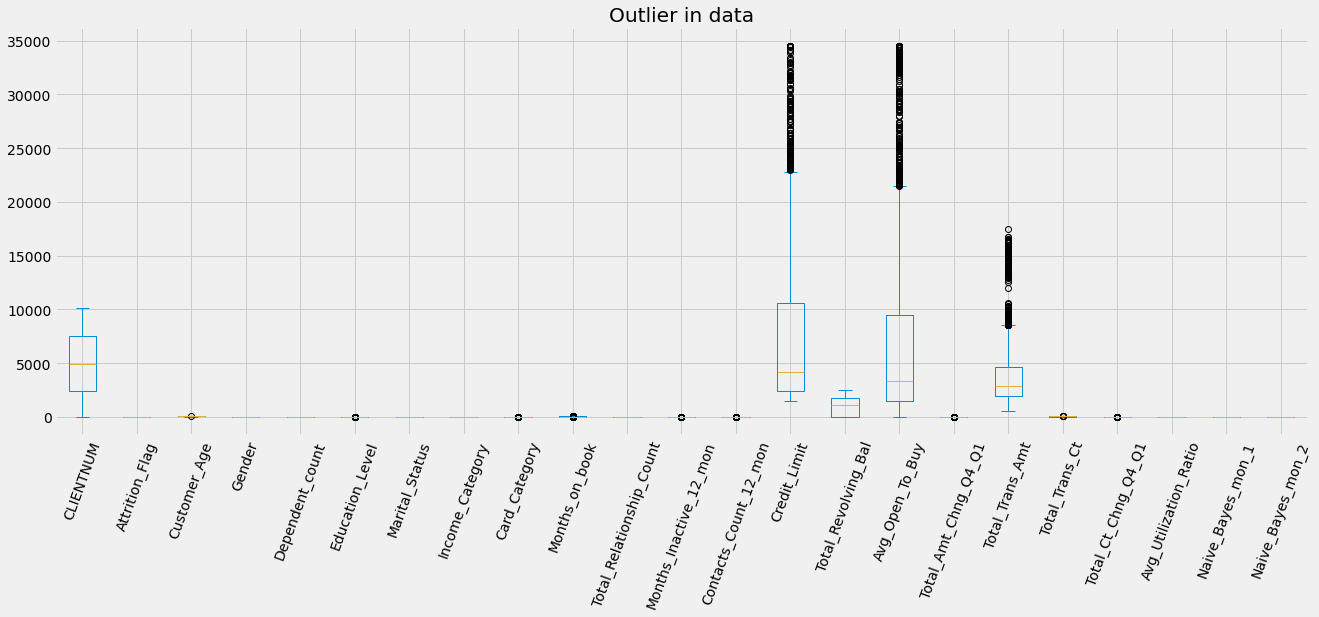

In [33]:
plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier in data');

In [34]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

In [35]:
outlier_list = ['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']
for i in df[outlier_list]:
    df[i]=treat_outlier(df[i])

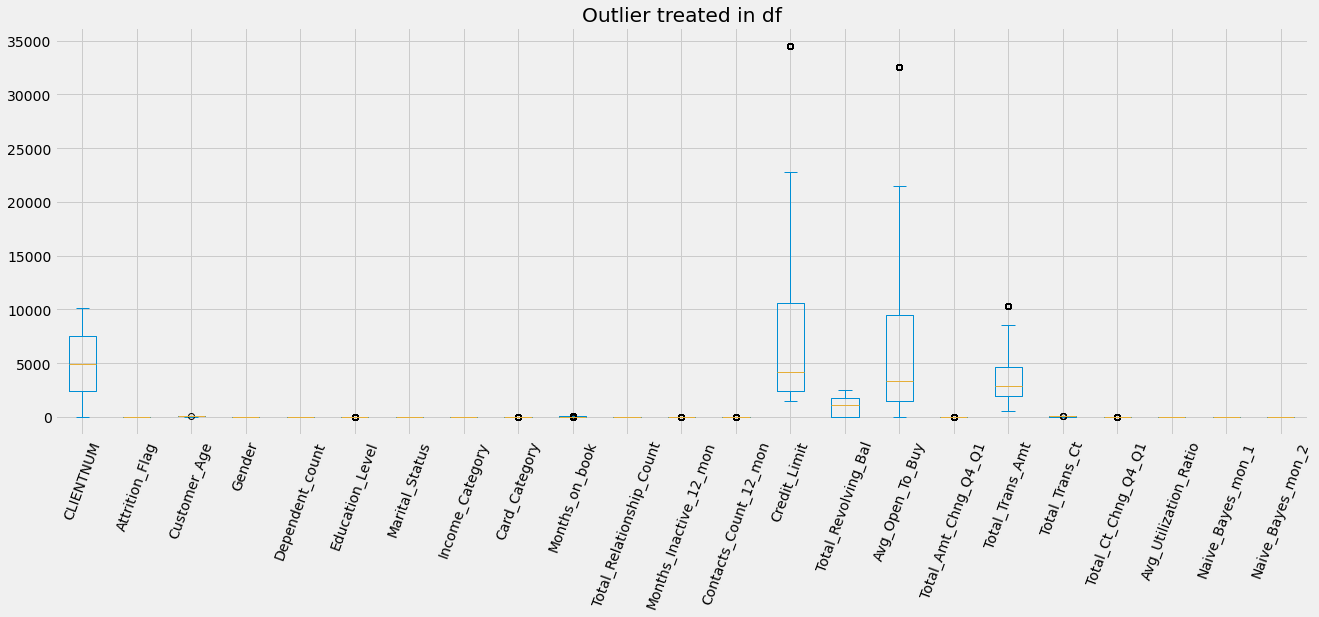

In [36]:
plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier treated in df');

[Text(0, 0.5, 'CLIENTNUM'),
 Text(0, 1.5, 'Attrition_Flag'),
 Text(0, 2.5, 'Customer_Age'),
 Text(0, 3.5, 'Gender'),
 Text(0, 4.5, 'Dependent_count'),
 Text(0, 5.5, 'Education_Level'),
 Text(0, 6.5, 'Marital_Status'),
 Text(0, 7.5, 'Income_Category'),
 Text(0, 8.5, 'Card_Category'),
 Text(0, 9.5, 'Months_on_book'),
 Text(0, 10.5, 'Total_Relationship_Count'),
 Text(0, 11.5, 'Months_Inactive_12_mon'),
 Text(0, 12.5, 'Contacts_Count_12_mon'),
 Text(0, 13.5, 'Credit_Limit'),
 Text(0, 14.5, 'Total_Revolving_Bal'),
 Text(0, 15.5, 'Avg_Open_To_Buy'),
 Text(0, 16.5, 'Total_Amt_Chng_Q4_Q1'),
 Text(0, 17.5, 'Total_Trans_Amt'),
 Text(0, 18.5, 'Total_Trans_Ct'),
 Text(0, 19.5, 'Total_Ct_Chng_Q4_Q1'),
 Text(0, 20.5, 'Avg_Utilization_Ratio'),
 Text(0, 21.5, 'Naive_Bayes_mon_1'),
 Text(0, 22.5, 'Naive_Bayes_mon_2')]

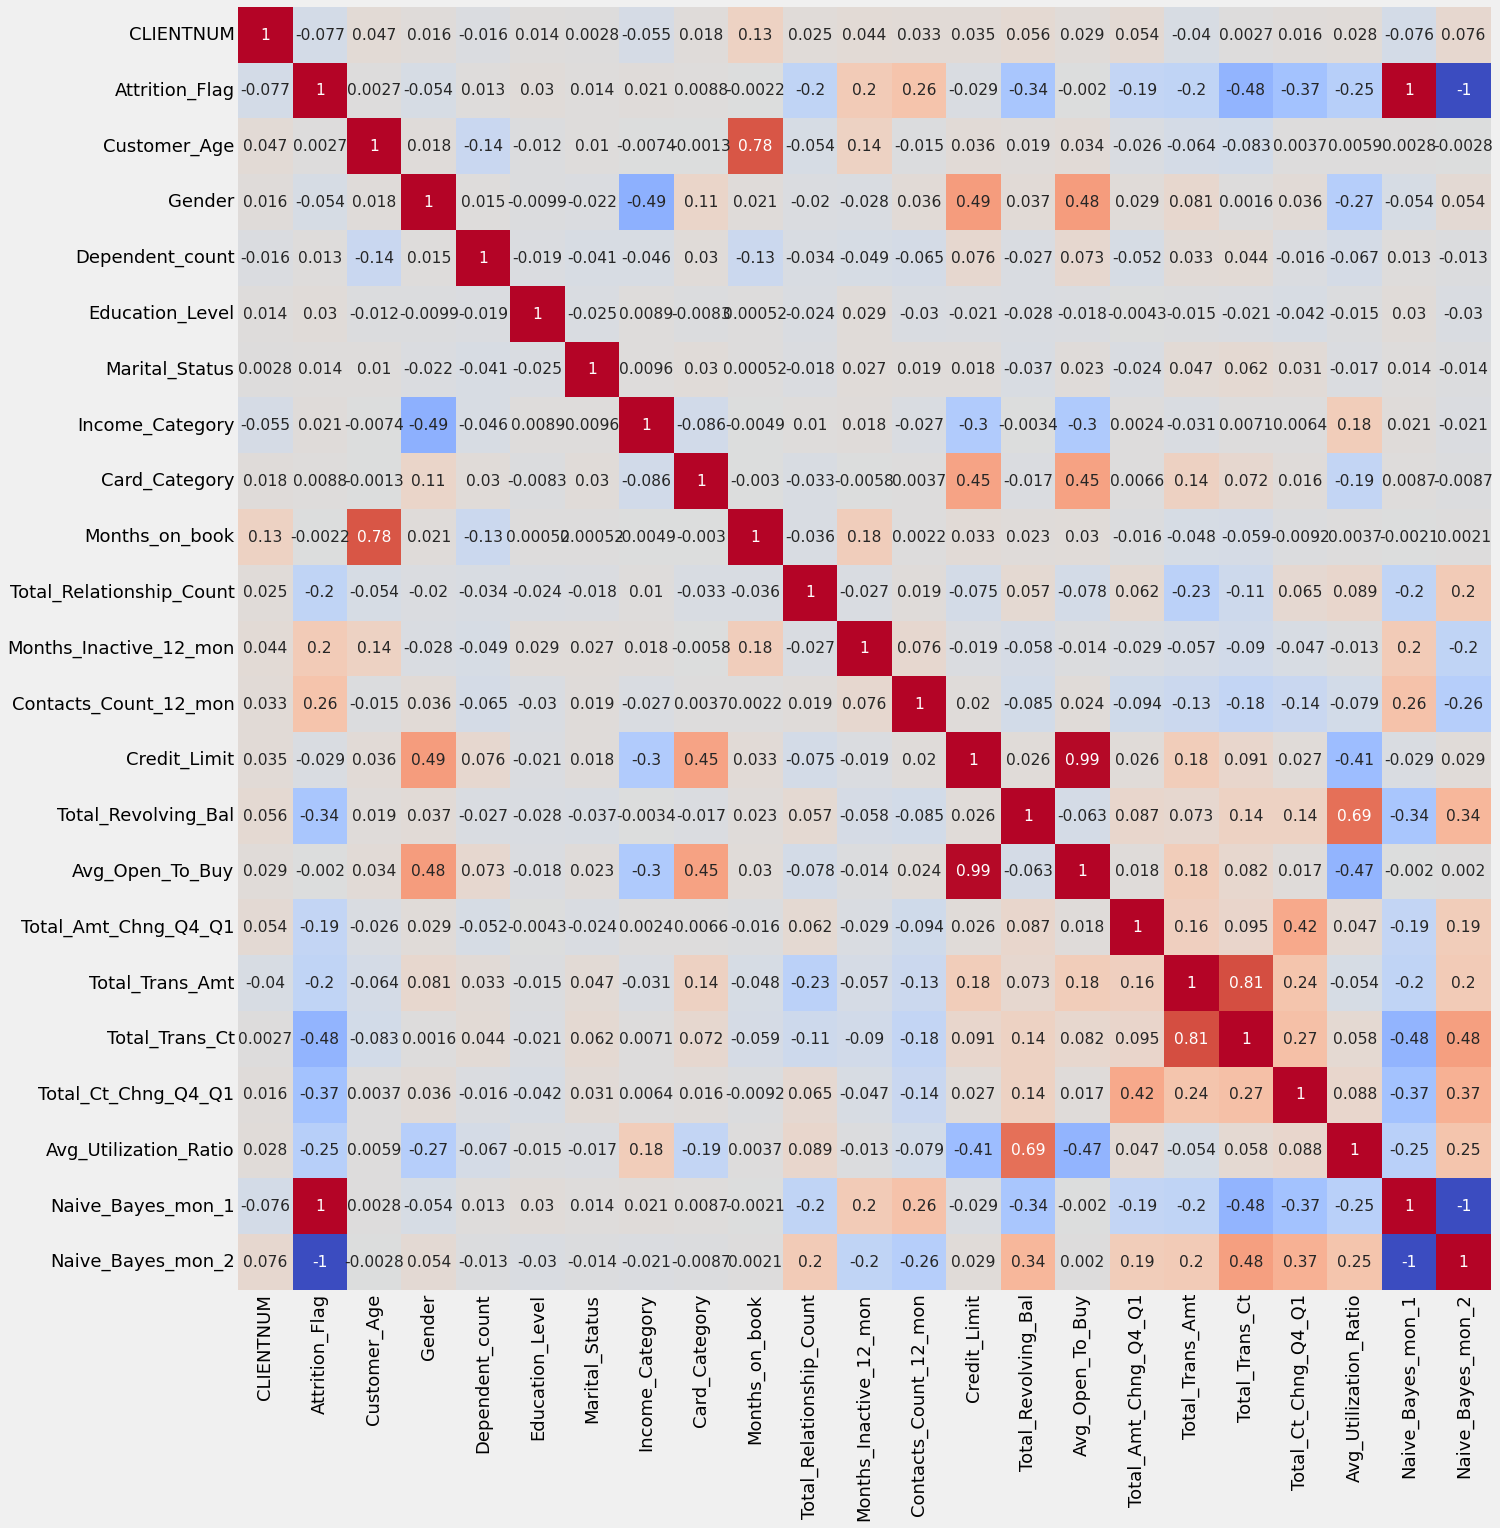

In [37]:
fig, ax = plt.subplots( figsize = (20,22) )
res = sns.heatmap( df.corr(), cmap='coolwarm', annot=True, ax = ax, annot_kws={"size": 15.5}, cbar=False)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18, rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)

In [38]:
df.corr()['Attrition_Flag'].sort_values(ascending=False)

Attrition_Flag              1.000000
Naive_Bayes_mon_1           0.999985
Contacts_Count_12_mon       0.256747
Months_Inactive_12_mon      0.201034
Education_Level             0.030123
Income_Category             0.021424
Marital_Status              0.013733
Dependent_count             0.012593
Card_Category               0.008757
Customer_Age                0.002732
Avg_Open_To_Buy            -0.001988
Months_on_book             -0.002248
Credit_Limit               -0.028846
Gender                     -0.053758
CLIENTNUM                  -0.076513
Total_Amt_Chng_Q4_Q1       -0.185905
Total_Trans_Amt            -0.195643
Total_Relationship_Count   -0.198175
Avg_Utilization_Ratio      -0.250029
Total_Revolving_Bal        -0.337483
Total_Ct_Chng_Q4_Q1        -0.369540
Total_Trans_Ct             -0.475072
Naive_Bayes_mon_2          -0.999985
Name: Attrition_Flag, dtype: float64

# Modelling

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2740 entries, 9808 to 5765
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 2740 non-null   int64  
 1   Attrition_Flag            2740 non-null   int32  
 2   Customer_Age              2740 non-null   int64  
 3   Gender                    2740 non-null   int32  
 4   Dependent_count           2740 non-null   int64  
 5   Education_Level           2740 non-null   int8   
 6   Marital_Status            2740 non-null   int32  
 7   Income_Category           2740 non-null   int32  
 8   Card_Category             2740 non-null   int32  
 9   Months_on_book            2740 non-null   int64  
 10  Total_Relationship_Count  2740 non-null   int64  
 11  Months_Inactive_12_mon    2740 non-null   int64  
 12  Contacts_Count_12_mon     2740 non-null   int64  
 13  Credit_Limit              2740 non-null   float64
 14  Total

In [40]:
X=df[['Total_Ct_Chng_Q4_Q1',
'Total_Trans_Ct',
'Total_Revolving_Bal',
'Contacts_Count_12_mon',
'Months_Inactive_12_mon',
'Total_Relationship_Count']]
y = df["Attrition_Flag"]

In [41]:
num_columns = X.select_dtypes(include='number').columns.tolist()
num_columns

['Total_Ct_Chng_Q4_Q1',
 'Total_Trans_Ct',
 'Total_Revolving_Bal',
 'Contacts_Count_12_mon',
 'Months_Inactive_12_mon',
 'Total_Relationship_Count']

In [42]:
num_features = [] 

for i in num_columns:
    location = X.columns.get_loc(i)
    num_features.append(location)
print(num_features)  

[0, 1, 2, 3, 4, 5]


In [43]:
cat_columns = X.select_dtypes(include='object').columns.tolist()
cat_columns

[]

In [44]:
cat_features = []

for i in cat_columns:
    location = X.columns.get_loc(i)
    cat_features.append(location)
print(cat_features)  

[]


In [45]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from imblearn.pipeline import make_pipeline as imbl_pipe
preprocess = make_column_transformer(
    (MinMaxScaler(), num_features),
    (OneHotEncoder(sparse=False), cat_features)
)
preprocess

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 [0, 1, 2, 3, 4, 5]),
                                ('onehotencoder', OneHotEncoder(sparse=False),
                                 [])])

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1234)

In [47]:
from imblearn.over_sampling import SMOTE 
OS_SMOTE = SMOTE()

X_train, y_train = OS_SMOTE.fit_resample(X_train,y_train)

   Labels  Attrition_Flag
0       0            1129
1       1            1129


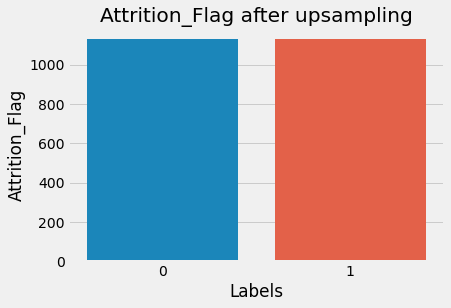

In [48]:
oversample_plot = y_train.value_counts().reset_index()
oversample_plot.columns = ['Labels','Attrition_Flag']
print(oversample_plot)
sns.barplot(x='Labels',y='Attrition_Flag',data=oversample_plot);
plt.title('Attrition_Flag after upsampling');

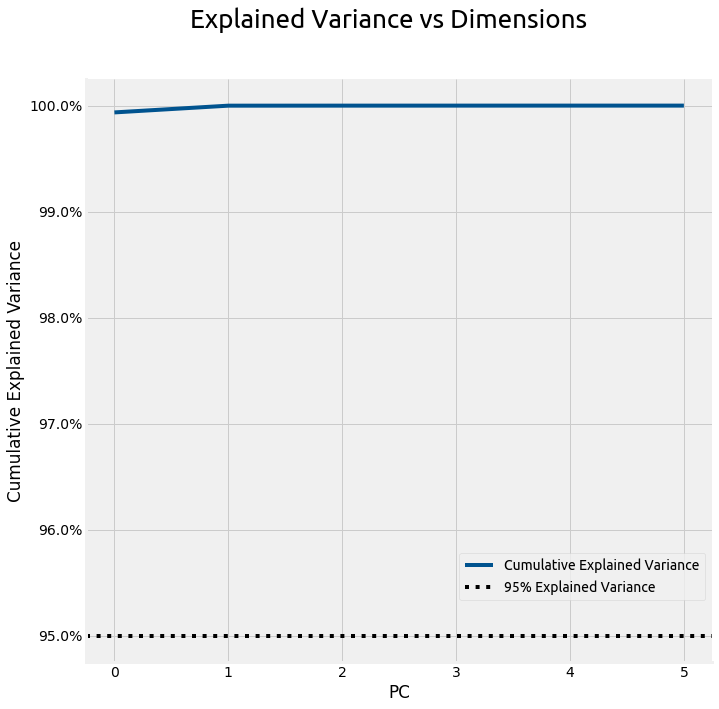

In [49]:
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick

pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]

# Visualize
fig, ax = plt.subplots(figsize =(10, 10))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'Ubuntu'
mpl.rcParams['font.size'] = 14

ax.plot(d,cumsum, color = '#00538F', label='Cumulative Explained Variance')

ax.axhline(y = 95, color='black', linestyle=':', label = '95% Explained Variance')
ax.legend(loc='best')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top','right']:
    ax.spines[i].set_visible(False)

# Set percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# annotation arrow
arrowprops = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
plt.annotate('Principal Component Number 19', 
             xy=(19, 95), 
             xytext=(19+5, 95+10), 
             arrowprops=arrowprops,
             size = 14)

plt.legend(bbox_to_anchor = (1, 0.2))

plt.suptitle('Explained Variance vs Dimensions', size=26)
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('PC');

In [51]:
pca = PCA(.95) 
pca.fit(X_train)

X_pca = pca.transform(X_train)
X_pca = pd.DataFrame(X_pca)

print(f'''Shape of X before PCA: {X_train.shape}
Shape of X after PCA: {X_pca.shape}''')

Shape of X before PCA: (2258, 6)
Shape of X after PCA: (2258, 1)


#### Random Forest

In [52]:
# Import classifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE 


# Define model with pipeline
model_rf = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=10),
                  RandomForestClassifier())

model_rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('smote', SMOTE(random_state=10)),
                ('randomforestclassifier', RandomForestClassifier())])

In [53]:
from sklearn.model_selection import GridSearchCV
rf_param_grid = {
    'randomforestclassifier__n_estimators' : [50, 100, 150],
    'randomforestclassifier__max_features' : ['sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 5 ,10, 15],
    'randomforestclassifier__criterion' : ['gini', 'entropy'],
    'randomforestclassifier__min_samples_split' : [2, 3, 4]
}
rf_grid = GridSearchCV(model_rf, rf_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [54]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.892 total time=   0.3s
[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.876 total time=   0.0s
[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.856 total time=   0.0s
[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4,
                                                                          5]),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(sparse=False),
                                                                         [])])),
                                       ('smote', SMOTE(random_state=10)),
                                       ('randomforestclassifier',
             

In [55]:
print(rf_grid.best_score_)

0.8906186841433982


In [56]:
print(f"Training Data Score: {rf_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {rf_grid.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8722627737226277


In [57]:
predictions = rf_grid.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 1 0 0 0 0 1 1 0]
First 10 Actual labels: [0, 1, 0, 0, 0, 1, 0, 1, 1, 0]


In [58]:
# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predictions)
print(cm)

[[443  55]
 [ 50 274]]


In [59]:
cm = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cm)

[[0.89 0.11]
 [0.15 0.85]]


In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       498
           1       0.83      0.85      0.84       324

    accuracy                           0.87       822
   macro avg       0.87      0.87      0.87       822
weighted avg       0.87      0.87      0.87       822



##### KNN

In [61]:
# Import classifier
from sklearn.neighbors import KNeighborsClassifier

# Define model with pipeline
model_knn = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=10),
                  KNeighborsClassifier())

model_knn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('smote', SMOTE(random_state=10)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [62]:
from sklearn.model_selection import GridSearchCV
kn_param_grid = {
    'kneighborsclassifier__n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'kneighborsclassifier__weights' : ['uniform', 'distance'],
    'kneighborsclassifier__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
kn_grid = GridSearchCV(model_knn, kn_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [63]:
kn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform;, score=0.841 total time=   0.1s
[CV 2/5] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform;, score=0.832 total time=   0.0s
[CV 3/5] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform;, score=0.823 total time=   0.0s
[CV 4/5] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform;, score=0.812 total time=   0.0s
[CV 5/5] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform;, score=0.847 total time=   0.0s
[CV 1/5] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=distance;, score=0.841 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4,
                                                                          5]),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(sparse=False),
                                                                         [])])),
                                       ('smote', SMOTE(random_state=10)),
                                       ('kneighborsclassifier',
               

In [64]:
print(kn_grid.best_params_)

{'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'uniform'}


In [65]:
print(kn_grid.best_score_)

0.8618291701822892


In [66]:
print(f"Training Data Score: {kn_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {kn_grid.score(X_test, y_test)}")

Training Data Score: 0.87466784765279
Testing Data Score: 0.8527980535279805


In [67]:
predictions = kn_grid.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 1 1 0 0 0 0 1 1 1]
First 10 Actual labels: [0, 1, 0, 0, 0, 1, 0, 1, 1, 0]


In [68]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[439  59]
 [ 62 262]]


In [69]:
cm = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cm)

[[0.88 0.12]
 [0.19 0.81]]


In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       498
           1       0.82      0.81      0.81       324

    accuracy                           0.85       822
   macro avg       0.85      0.85      0.85       822
weighted avg       0.85      0.85      0.85       822



##### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression 

# Define model with pipeline
model_LR = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=10),
                  LogisticRegression(random_state=10))

model_LR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('smote', SMOTE(random_state=10)),
                ('logisticregression', LogisticRegression(random_state=10))])

In [72]:
lr_param_grid = {
    'logisticregression__C' : [0.01, 0.05, 0.1, 0.5, 1, 5],
    'logisticregression__solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

lr_grid = GridSearchCV(model_LR, lr_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [73]:
lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.799 total time=   0.1s
[CV 2/5] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.788 total time=   0.0s
[CV 3/5] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.772 total time=   0.0s
[CV 4/5] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.794 total time=   0.0s
[CV 5/5] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.783 total time=   0.0s
[CV 1/5] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.788 total time=   0.1s
[CV 2/5] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.772 total time=   0.0s
[CV 3/5] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.757 total time=   0.0s
[CV 4/5] END logisticregression__C=0.01, logisticr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4,
                                                                          5]),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(sparse=False),
                                                                         [])])),
                                       ('smote', SMOTE(random_state=10)),
                                       ('logisticregression',
                 

In [74]:
print(lr_grid.best_params_)

{'logisticregression__C': 1, 'logisticregression__solver': 'liblinear'}


In [75]:
print(lr_grid.best_score_)

0.8170967172262229


In [76]:
print(f"Training Data Score: {lr_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_grid.score(X_test, y_test)}")

Training Data Score: 0.8179805137289636
Testing Data Score: 0.7968369829683698


In [77]:
predictions = lr_grid.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 1 0 0 0 0 0 1 1 0]
First 10 Actual labels: [0, 1, 0, 0, 0, 1, 0, 1, 1, 0]


In [78]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[409  89]
 [ 78 246]]


In [79]:
cm = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cm)

[[0.82 0.18]
 [0.24 0.76]]


In [80]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       498
           1       0.73      0.76      0.75       324

    accuracy                           0.80       822
   macro avg       0.79      0.79      0.79       822
weighted avg       0.80      0.80      0.80       822



In [81]:
pred = lr_grid.predict(X_test[:1])

In [82]:
print(f"Predicted classes: {pred}")
print(f"Actual Labels: {list(y_test[:1])}")

Predicted classes: [0]
Actual Labels: [0]


#### SVM

In [83]:
from sklearn.svm import SVC 
model_SVM = imbl_pipe(preprocess,
                  SVC(random_state=10))

model_SVM

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('svc', SVC(random_state=10))])

In [84]:

param_grid = {'svc__kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
              'svc__C': [0.0005,0.001, 0.01, 0.1, 0.5],
              'svc__gamma': [5, 1, 0.1, 0.01]}
svm_grid = GridSearchCV(model_SVM, param_grid, verbose=3, cv= 5, n_jobs=4)

In [85]:
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4,
                                                                          5]),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(sparse=False),
                                                                         [])])),
                                       ('svc', SVC(random_state=10))]),
             n_jobs=4,
             param_grid={'svc__C': [0.0005, 0.001, 0.01, 0

In [86]:
print(svm_grid.best_params_)

{'svc__C': 0.5, 'svc__gamma': 5, 'svc__kernel': 'rbf'}


In [87]:
print(svm_grid.best_score_)

0.8605076231775994


In [88]:
print(f"Training Data Score: {svm_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {svm_grid.score(X_test, y_test)}")

Training Data Score: 0.8813108945969885
Testing Data Score: 0.8564476885644768


In [89]:
predictions = lr_grid.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 1 0 0 0 0 0 1 1 0]
First 10 Actual labels: [0, 1, 0, 0, 0, 1, 0, 1, 1, 0]


In [90]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[409  89]
 [ 78 246]]


In [91]:
cm = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cm)

[[0.82 0.18]
 [0.24 0.76]]


In [92]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       498
           1       0.73      0.76      0.75       324

    accuracy                           0.80       822
   macro avg       0.79      0.79      0.79       822
weighted avg       0.80      0.80      0.80       822



In [93]:
pred = lr_grid.predict(X_test[:1])

In [94]:
print(f"Predicted classes: {pred}")
print(f"Actual Labels: {list(y_test[:1])}")

Predicted classes: [0]
Actual Labels: [0]


#### XGBOOST

In [95]:
# Import XGBoost
import xgboost as xgb

# Define model with pipeline
model_xgb = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=10),
                  xgb.XGBClassifier(random_state=10))

model_xgb

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('smote', SMOTE(random_state=10)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, enable_categorical=Fals...
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               mo

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = {'xgbclassifier__gamma': [0.5, 0.8, 1],
              'xgbclassifier__max_depth': [3, 4, 5, 6],
              'xgbclassifier__n_estimators': [50, 100, 200]
        }
xgb_grid = GridSearchCV(model_xgb, param_grid, verbose=3, cv= 5, n_jobs=4, scoring='f1_macro')

In [97]:
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[21:13:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4,
                                                                          5]),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(sparse=False),
                                                                         [])])),
                                       ('smote', SMOTE(random_state=10)),
                                       ('xgbclassifier',
                      

In [98]:
print(xgb_grid.best_params_)

{'xgbclassifier__gamma': 0.8, 'xgbclassifier__max_depth': 4, 'xgbclassifier__n_estimators': 50}


In [99]:
print(xgb_grid.best_score_)

0.8883593121930605


In [100]:
print(f"Training Data Score: {xgb_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {xgb_grid.score(X_test, y_test)}")

Training Data Score: 0.9273691254843535
Testing Data Score: 0.8758361745285055


In [101]:
predictions = xgb_grid.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 0 1 0 0 0 0 1 1 0]
First 10 Actual labels: [0, 1, 0, 0, 0, 1, 0, 1, 1, 0]


In [102]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[444  54]
 [ 44 280]]


In [103]:
cm = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cm)

[[0.89 0.11]
 [0.14 0.86]]


In [104]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       498
           1       0.84      0.86      0.85       324

    accuracy                           0.88       822
   macro avg       0.87      0.88      0.88       822
weighted avg       0.88      0.88      0.88       822



In [105]:
cm = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cm)

[[0.89 0.11]
 [0.14 0.86]]


In [106]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       498
           1       0.84      0.86      0.85       324

    accuracy                           0.88       822
   macro avg       0.87      0.88      0.88       822
weighted avg       0.88      0.88      0.88       822

